In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/rohan/Desktop/Classification/teleCust1000t1.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E0F766160>]],
      dtype=object)

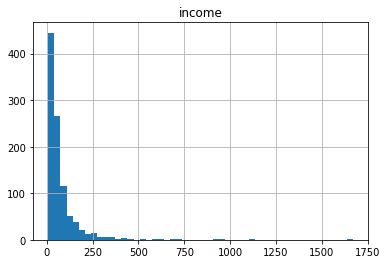

In [4]:
df.hist(column='income',bins=50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [9]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [10]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set',X_train.shape,y_train.shape)
print('Test set',X_test.shape,y_test.shape)

Train set (800, 11) (800,)
Test set (200, 11) (200,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [16]:
yhat=neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4], dtype=int64)

In [21]:
from sklearn import metrics 
print("Train set accuracy:",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Train set accuracy: 0.55625
Test set accuracy: 0.26


In [23]:
from sklearn.neighbors import KNeighborsClassifier
k=6
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh
yhat=neigh.predict(X_test)
yhat[0:5]
from sklearn import metrics 
print("Train set accuracy:",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set accuracy:",metrics.accuracy_score(y_test,yhat))

Train set accuracy: 0.495
Test set accuracy: 0.295


In [26]:
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfusionMx=[];
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc    

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

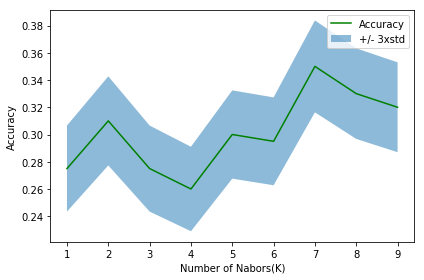

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.5)
plt.legend(('Accuracy','+/- 3xstd'))
plt.xlabel('Number of Nabors(K)')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [30]:
print("the best accuracy was with",mean_acc.max(),'with k=',mean_acc.argmax()+1)

the best accuracy was with 0.35 with k= 7
